## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0499 - Proyecto Eléctrico
#### Segundo semestre del 2020


Elaborado por Jeaustin Sirias Chacón

# *La ley de Benford desde cerca*

> Esta actividad reúne herramientas de programación y la teoría clásica de la probabilidad en un estudio de aplicación con la Ley de Benford como parte del fortalecimiento a los tópicos del curso Modelos Probabilísticos de Señales y Sistemas, bajo el Proyecto Electrico *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.

---


## Ley de Benford

### Historia

Echando un vistazo al año 1930 el astrónomo Simon Newcomb tuvo la curiosidad de observar que las hojas en uno de sus libros se encontraban notablemente más desgastadas cuando el primer dígito en las páginas iniciaban particularmente con el número 1. 


<img align='center' src='https://media.giphy.com/media/DHqth0hVQoIzS/giphy.gif'>


El detalle condujo a formalizar que probabilísticamente era mayormente posible dar con un 1 en el dígito inicial y sucesivamente las posibilidades se reducían para los números {2, 3, ..., 9} de hallarse como primer dígito de forma fortuita. Inicialmente el resultado del sustento fue la propuesta de que para el la probabilidad de ocurrencia de cada símbolo numeral i, es:
$${\displaystyle P(i) = log(i+1) - log(i)}$$

Ya para 1930, de una manera no tan formal, el físico Frank Benford sometió la información histórica de eventos cotidianos que incluían constantes físicas, contenidos estadísticos poblacionales, áreas geográficas y otros con el objetivo de verificar que el primer dígito distinto de cero observado aleatoriamente aparece con menor frecuencia con valores más grandes bajo un comportamiento logarítmico. Posteriormente Ted Hill finalmenyte formalizó esta hipótesis de años dando paso a la *Ley de números anómalos de Benford-Newcomb.*
### Postulado
*Sea N la primera cifra en una magnitud aleatoria, no nula tal que $N = {1, 2, 3, ..., 9}$. Entonces la probabilidad de ocurrencia de N es:* 


$$\displaystyle P(N) = \log{(N + 1)} - \log{N} $$


La distribución por frecuencia, entonces para cada dígito se visualiza de la siguiente forma:


<img src="benford.png"/>

Algunos escenarios concurrentes para someter a prueba la ley de Benford pueden ser:

* Información histórica de una variable climática: temperatura, precipitación, radiación solar...
* El número de 'likes' en cada post de una celebridad reconocida en Instagram.
* El número en las placas vehiculares observadas durante todo un día en la GAM.
* La cantidad de nuevos casos positivos, diarios en cada cantón desde el inicio de la pandemia del COVID-19 en Costa Rica.
* Los nacimientos diarios a nivel nacional desde 1990 hasta el presente.
* Los precios de los productos en un supermercado o en una tienda.

Luego, resulta bastante relevante la posibilidad de implementar una breve rutina en Python capaz de corroborar la ley de Benford a partir de una base de datos local de la que se intuye puede seguir dicho patrón de una manera visual más cálida, de modo que para iniciar se importan las siguientes librerías científicas conocidas:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Es de beneficio aprovechar los conocimientos en programación orientada a procedimientos para definir un flujo de ejecución sencillo. Una estrategia funcional es definir una cadena de funciones con procedimientos separados que operen sobre una base datos unifilar; tal así 

      

### 1. Una función que lea la base de datos en formato .csv y la convierta en una lista:

In [2]:
import pandas as pd
import numpy as np

def readData(inputDs, indexName): #Por ejemplo, llamar la funcion como readData('nacimientos.csv', indexName = CR)

    data = pd.read_csv(inputDs, header = None, skiprows = 1, index_col = 0)
    return np.array(data.loc['{}'.format(indexName)]) #retorna una lista con los valores a estudiar


### 2. Una función que tome la lista anterior y lea el primer dígito no nulo en cada uno de los elementos, ademas de contar su ocurrencia y probabilidad:

In [3]:
import numpy as np

def computeFstDigit(vector):

    #Se definen las variables a necesitar
    fstDigit = []; strVect = []; strSize = []
    vecSize = np.arange(0, len(vector), 1)

    #Se convierte cada elemento de la lista en una cadena de caracteres:
    for i in vecSize:

        num = vector[i]
        if num == 0: continue;
        else: strVect.append(str(num));

    strSize = np.arange(0, len(strVect), 1)

    #Se lee el primer simbolo de cada cadena de caracteres. i.e, en '134', se lee '1'
    for j in strSize:

        if strVect[j][0] == '0': fstDigit.append(int(strVect[j][2]));
        else: fstDigit.append(int(strVect[j][0])); #se almacenan los digitos ahora como enteros

    #Ahora se lee cuantas veces se repite 1, 2, 3, ..., 9 en fstDigit
    counters = [] #Almacenamos el numero de veces que se repite cada unmero
    for k in np.arange(1, 10, 1):
        count = fstDigit.count(k)
        counters.append(count)
    totalSum = sum(counters)
    dataPerc = np.array([i/totalSum for i in counters])

    return counters, dataPerc, totalSum
    #counters is a 1x9 vector with the number of ocurrences per digit
    #dataPerc is the percentage of each each occurrence
    #totalSum is the sum of all occurrences from 1 to 9

### 3.  Una función que calcule el número de aciertos pronosticados usando la probabilidad de ocurrencia de cada dígito, según Benford, para la base de datos ingresada:

In [4]:
def lookForExpectedCounts(countsNum):

    bfVals = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6] #probabilidades de benford
    predictedVals = np.array([round((k*countsNum)/100) for k in bfVals]) #numero de ocurrencias pronosticadas

    return predictedVals, bfVals

### 4. Una función que visualice  e imprima un resumen sobre la base de los procedimientos anteriores:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def printSummary(dataset, ObsCounts, ExpCounts, pReal, bfVals):

    print('Resumen de conteos por símbolo:')
    print('Conteos observados: {}'.format(ObsCounts))
    print('Conteos predichos: {}'.format(ExpCounts))
    print("\n\n\nProbabilidad de ocurrencia por símbolo (1, 2, ..., 9):\n")

    for i in np.arange(0, 9, 1):

        print('Para {num}: Probabilidad observada: {p1}, Probabilidad por Benford: {p2}'.format(num = i +1, 
                                                                                    p1 = round(pReal[i], 3),
                                                                                   p2 = round(bfVals[i]/100, 3)))
    #Visualizacion
    plt.rcParams['axes.grid'] = True #fijar grillas en On para cada subfigura
    
    fig = plt.figure(tight_layout = True, figsize = (11, 8))
    figGrid = gridspec.GridSpec(2, 2)
    rawData = fig.add_subplot(figGrid[0, 0])
    dataHist = fig.add_subplot(figGrid[0, 1])
    benfordFreq = fig.add_subplot(figGrid[1, 0])
    benfordDist = fig.add_subplot(figGrid[1, 1])

    #linspaces
    xData = np.arange(0, len(dataset), 1)
    xDigits = np.arange(1, 10, 1)

    #RawData plot
    rawData.plot(xData, dataset, color = 'tab:red')
    rawData.set_xlabel('Tiempo')
    rawData.set_ylabel('Variable física')
    rawData.set_title('Comportamiento histórico de la variable')


    #dataHist
    dataHist.hist(dataset, bins = 25, color = 'g', histtype='bar', rwidth=0.8)
    dataHist.set_ylabel('Frequencia')
    dataHist.set_xlabel('Variable física ')
    dataHist.set_title('Histograma')

    #benfordDist
    benfordDist.bar(xDigits, ObsCounts, color = 'teal', label = 'Ocurrencias observadas en datos')

    for i in  xDigits:

        if i == xDigits[-1]:
            benfordDist.plot(i, ExpCounts[i-1], marker = 's', markersize = 8, color = 'firebrick', label = 'Ocurrencias esperadas según Benford')

        else:
            benfordDist.plot(i, ExpCounts[i-1], marker = 's', markersize = 8, color = 'firebrick')

    benfordDist.set_xlabel('Primer dígito')
    benfordDist.set_xticks(xDigits)
    benfordDist.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))
    benfordDist.set_ylabel('Número de ocurrencias')
    benfordDist.set_title('Distribución por cifra: Lo esperado vs. lo observado')
    benfordDist.legend()

    #benfordFreq plot
    benfordFreq.plot(xDigits, pReal*100, color = 'orangered', lw = 3, label = 'Probabilidad por ocurrencias observadas')
    benfordFreq.plot(xDigits, bfVals, '--', color = 'tab:blue', lw = 3, label = 'Lo que predijo Benford')
    benfordFreq.set_xlabel('Primer dígito')
    benfordFreq.set_ylabel('Frecuencia [%]')
    benfordFreq.set_title('Probabilidad por dígito dominante')

    benfordFreq.legend()

    fig.align_labels()
    plt.show()


### ¿Y ahora?

Entonces bien, se facilita hacer llamadas a funciones en el orden anterior. Para este ejemplo se utilizará una base de datos que contiene los registros de la precipitación histórica en decadías desde 1985 hasta 2019 para algunas localizaciones de Costa Rica. Dicho dominio es un candidato aceptable dado a que:

* Se cuenta con una elevada cantidad de muestras. *¿Cuántas decadías hay desde 1985 hasta 2019?*
* La precipitación es una variable física, por lo que no son valores aleatoreos.




**Un dato interesante**: Un mes tiene tres [decadías](http://iridl.ldeo.columbia.edu/maproom/Food_Security/Locusts/Regional/Dekadal_Rainfall/index.html), en donde las dos primeras tienen 10 días; es decir, 20 en total. La tercera decadía depende de cuántos días le resten al mes para terminar; por ejemplo, la tercera decadía de Enero tiene 11, la de Febrero, a lo sumo 9 (si es un año bisiesto) y del mismo modo para los meses siguientes. En total un año contendrá 36 decadías.

Resumen de conteos por símbolo:
Conteos observados: [372, 176, 104, 103, 78, 65, 59, 65, 60]
Conteos predichos: [326 190 135 105  85  72  63  55  50]



Probabilidad de ocurrencia por símbolo (1, 2, ..., 9):

Para 1: Probabilidad observada: 0.344, Probabilidad por Benford: 0.301
Para 2: Probabilidad observada: 0.163, Probabilidad por Benford: 0.176
Para 3: Probabilidad observada: 0.096, Probabilidad por Benford: 0.125
Para 4: Probabilidad observada: 0.095, Probabilidad por Benford: 0.097
Para 5: Probabilidad observada: 0.072, Probabilidad por Benford: 0.079
Para 6: Probabilidad observada: 0.06, Probabilidad por Benford: 0.067
Para 7: Probabilidad observada: 0.055, Probabilidad por Benford: 0.058
Para 8: Probabilidad observada: 0.06, Probabilidad por Benford: 0.051
Para 9: Probabilidad observada: 0.055, Probabilidad por Benford: 0.046


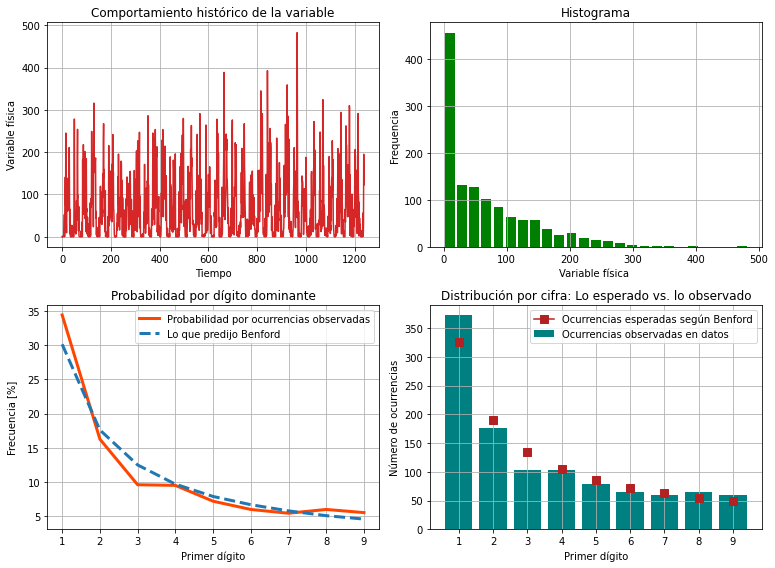

In [9]:
#Se llama la base de datos para generar la lista de informacion
data = readData('rainfall.csv', 'Poas') #Poas, Liberia, Carara, La Pita, Prusia, Rodeo...

#Se calculan el numero de ocurrencias de {1, 2, ..., 9} en el primer digito de cada elemento de la lista
#Se calcula su probabilidad de ocurrencia
#Se calcula el total de ocurrencias (que puede ser distinto de el numero de elementos iniciales, si hay ceros)
ocurrencias, prob_ocurrencias, conteos_totales = computeFstDigit(data)

#Se calculan las ocurrencias esperadas segun la ley de Benford 
ocurrencias_predecidas, prob_benford = lookForExpectedCounts(conteos_totales)

#Se visualizan los resultados
printSummary(data, ocurrencias, ocurrencias_predecidas, prob_ocurrencias, prob_benford)

### Observaciones

* La mayoría de las muestras de precipitación ocurridas tienen magnitudes entre los 0 mm y 100 mm.
* Se corrobora que el número de ocurrencias por símbolo en el dígito dominante es menos frecuente conforme aumenta su valor; por ejemplo, 1 obtuvo un 34.4 % de las ocurrencias; 2, un 16.3 % y 9, un 4.6 %. *¿Sigue este comportamiento, la ley de Benford?*

### ¿Puede estimarse qué tanto coincide la distribución encontrada con ?
*



